# Assignment 2
## 1. Properties of CNNs
### Question 1.2 (a)

In this first part, we will train a CNN model over the dataset CIFAR-10. This dataset contains 10 classes: plane, car, bird, cat, deer, dog, frog, horse, ship and truck.

First, let's load the data:

In [1]:
# Import libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [2]:
# Import data from CIFAR-10
# Define device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),])

# Load CIFAR-10 dataset
train_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
print(device)

cuda


In [4]:
type(train_data)

torchvision.datasets.cifar.CIFAR10

In [5]:
len(train_data)

50000

In [6]:
print(train_data[0])

(tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
         [0.0824, 0.0000, 0.0314,  ..., 0.1961, 0.1961, 0

In [7]:
image, label = train_data[0]
print(image.shape)
print(label)

torch.Size([3, 32, 32])
6


torch.Size([3, 32, 32])
0


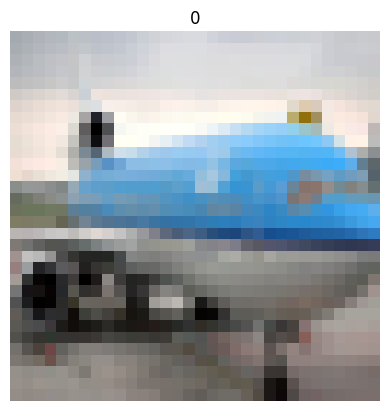

In [8]:
image, label = train_data[700]
print(image.shape)
print(label)

fig, ax = plt.subplots()
ax.imshow(image.permute(1, 2, 0).numpy())
ax.axis('off')
ax.set_title(label)

plt.show()

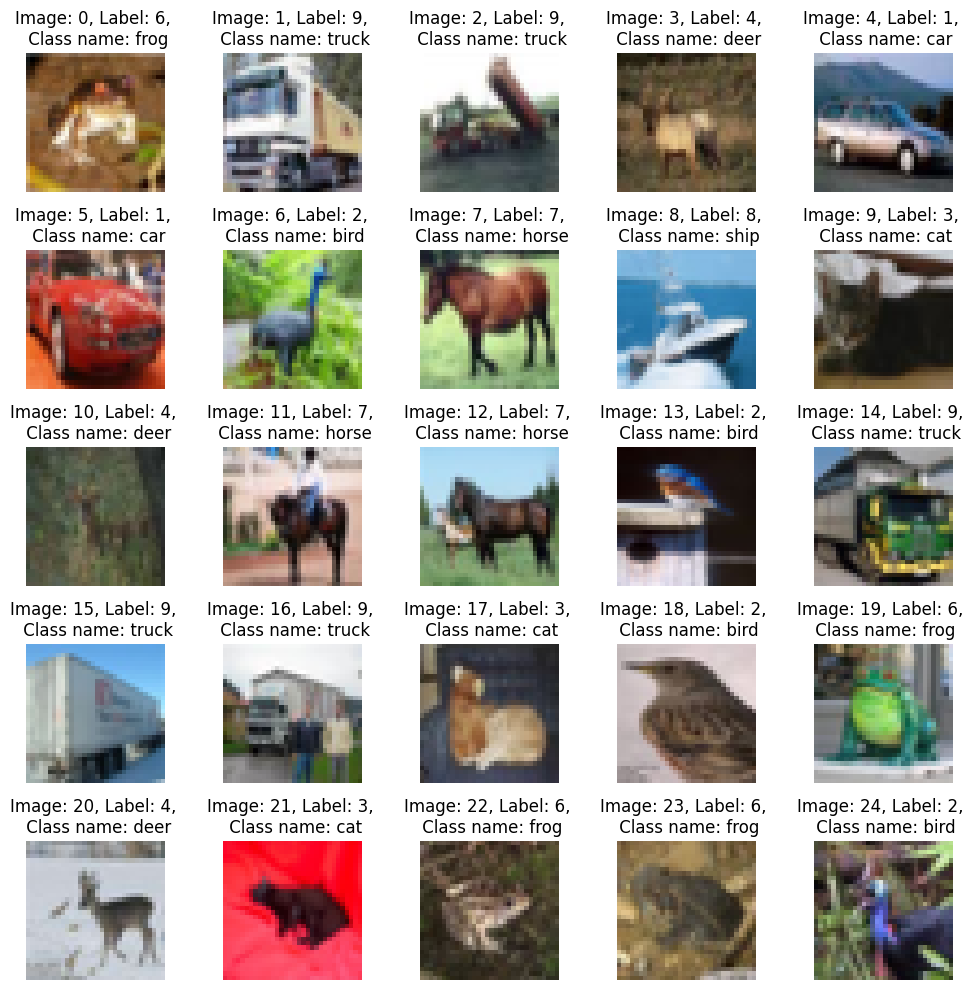

In [9]:
data = train_data
class_names = ["plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
img_num = 0
for row in range(5):
    for col in range(5):
        image, label = data[img_num]
        ax = axes[row, col]
        ax.imshow(image.permute(1, 2, 0).numpy())
        ax.set_title(f"Image: {img_num}, Label: {label}, \n Class name: {class_names[label]}")
        ax.axis('off')
        img_num += 1
plt.tight_layout()
plt.show()

Create a function to display the first 25 images of a dataset with their corresponding class name and use it over `train_data`.

Hint: `class_names = ["plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]`, where the labels are the corresponding index.
   

In [10]:
def display_first_few_images(data):
    #######################
    # PUT YOUR CODE HERE  #
    #######################
    class_names = ["plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
    rows = 5
    cols = 5
    fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
    img_num = 0
    for row in range(rows):
        for col in range(cols):
            image, label = data[img_num]
            ax = axes[row, col]
            ax.imshow(image.permute(1, 2, 0).numpy())
            ax.set_title(f"Image: {img_num}, Label: {label}, \n Class name: {class_names[label]}")
            ax.axis('off')
            img_num += 1
    plt.tight_layout()
    plt.show()

    #######################
    # END OF YOUR CODE    #
    #######################

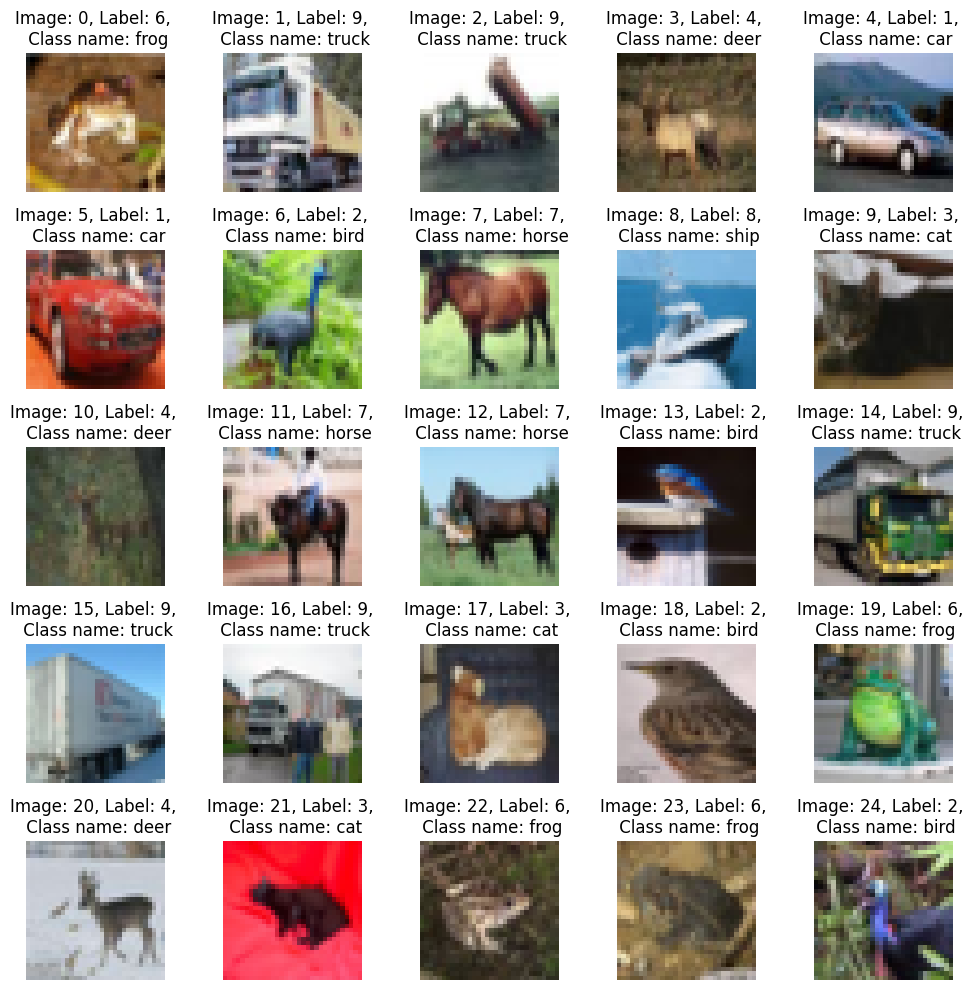

In [11]:
display_first_few_images(train_data)

Now, we will load and train a small CNN model! In the following cells you can check the architecture of the model and the designed function for its training.

Note: You shouldn't need Snellius to run it. Either Google Collab or your local computer should be enough.

In [12]:
print(f"CUDA Available: {torch.cuda.is_available()}")

CUDA Available: True


In [13]:
print(f"Device: {device}")

Device: cuda


In [14]:
# Define the model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 4 * 4, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(-1, 64 * 4 * 4)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Function for training the model
def train(model, train_loader, epochs = 10):
    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Train
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in tqdm(train_loader):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")

In [15]:
# Initialize the model
model = CNN().to(device)

# Train the model
train(model, train_loader)

100%|██████████| 782/782 [00:11<00:00, 69.29it/s]


Epoch 1, Loss: 1.6049


100%|██████████| 782/782 [00:10<00:00, 71.53it/s]


Epoch 2, Loss: 1.2328


100%|██████████| 782/782 [00:10<00:00, 71.61it/s]


Epoch 3, Loss: 1.0616


100%|██████████| 782/782 [00:11<00:00, 67.65it/s]


Epoch 4, Loss: 0.9470


100%|██████████| 782/782 [00:10<00:00, 72.04it/s]


Epoch 5, Loss: 0.8658


100%|██████████| 782/782 [00:10<00:00, 71.60it/s]


Epoch 6, Loss: 0.8030


100%|██████████| 782/782 [00:10<00:00, 73.78it/s]


Epoch 7, Loss: 0.7515


100%|██████████| 782/782 [00:10<00:00, 73.30it/s]


Epoch 8, Loss: 0.7069


100%|██████████| 782/782 [00:11<00:00, 68.34it/s]


Epoch 9, Loss: 0.6691


100%|██████████| 782/782 [00:12<00:00, 61.13it/s]

Epoch 10, Loss: 0.6338


Now, we want to check the performance of the trained model for the test dataset when rotating the images 0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330 and 360 degrees.

For this, you need to first create the function `get_acc_per_angle` that computes the accuracies_per_angle for a given model. You should create a `rotated_test_data` and a `rotated_test_loader`, from which taking the images and labels to give as input to the `inference` function that is provided to you in the following cell.

Then, create a `plot` function that plots the accuracy of the model per angle of rotation of the images.   

Hint: Check how we used transformations in section a.

In [16]:
def inference(model, images, labels):
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, predictions = torch.max(outputs, 1)
    return predictions

In [18]:
def get_acc_per_angle(model):
    angles = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360]
    angle_accuracies = []

    with torch.no_grad():
        for angle in angles:
            #######################
            # PUT YOUR CODE HERE  #
            #######################
            print(f"Processing angle: {angle}")

            # Define the transform (similar to what we did earlier)
            # We want to use:
            # rotated_transform = transforms.Compose([ transforms.RandomRotation([angle, angle]), # Rotate by a fixed angle
            #                                         transforms.ToTensor() ])

            transform_rotate_given_angle = transforms.Compose([
                transforms.RandomRotation((angle,angle)),
                transforms.ToTensor()])


            # create the a rotated_test_data and a rotated_test_loader,
            # from which taking the images and labels to give as input to the
            # inference function that we were given

            # Load CIFAR-10 dataset
            rotated_test_data = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_rotate_given_angle)

            # Create test loader
            rotated_test_loader = torch.utils.data.DataLoader(
                rotated_test_data, batch_size=64, shuffle=False
            )

            # Set up the count for the accuracy
            correct = 0
            total = 0

            for rotated_images, labels in rotated_test_loader:
                # Move to device
                rotated_images, labels = rotated_images.to(device), labels.to(device)

                # Perform inference
                predictions = inference(model, rotated_images, labels)
                correct += (predictions == labels).sum().item()
                total += labels.size(0)

            # Calculate accuracy
            accuracy = correct / total
            print(f"Angle: {angle}, Accuracy: {accuracy}")
            angle_accuracies.append(accuracy)


            #######################
            # END OF YOUR CODE    #
            #######################

    return angles, angle_accuracies

In [19]:
angles, angle_accuracies = get_acc_per_angle(model)

Processing angle: 0
Files already downloaded and verified
Angle: 0, Accuracy: 0.7252
Processing angle: 30
Files already downloaded and verified
Angle: 30, Accuracy: 0.3113
Processing angle: 60
Files already downloaded and verified
Angle: 60, Accuracy: 0.2206
Processing angle: 90
Files already downloaded and verified
Angle: 90, Accuracy: 0.267
Processing angle: 120
Files already downloaded and verified
Angle: 120, Accuracy: 0.1744
Processing angle: 150
Files already downloaded and verified
Angle: 150, Accuracy: 0.2036
Processing angle: 180
Files already downloaded and verified
Angle: 180, Accuracy: 0.3105
Processing angle: 210
Files already downloaded and verified
Angle: 210, Accuracy: 0.1779
Processing angle: 240
Files already downloaded and verified
Angle: 240, Accuracy: 0.1693
Processing angle: 270
Files already downloaded and verified
Angle: 270, Accuracy: 0.2567
Processing angle: 300
Files already downloaded and verified
Angle: 300, Accuracy: 0.199
Processing angle: 330
Files alrea

In [20]:
# Plot accuracy vs rotation angle
def plot(angles, angle_accuracies):
            #######################
            # PUT YOUR CODE HERE  #
            #######################
            # raise NotImplementedError
            plt.figure(figsize=(8, 6))
            plt.plot(angles, angle_accuracies, marker='o')
            plt.title("Accuracy vs. Rotation Angle")
            plt.xlabel("Rotation Angle (degrees)")
            plt.ylabel("Accuracy")
            plt.grid(True)
            plt.xticks(angles)
            plt.show()
            #######################
            # END OF YOUR CODE    #
            #######################

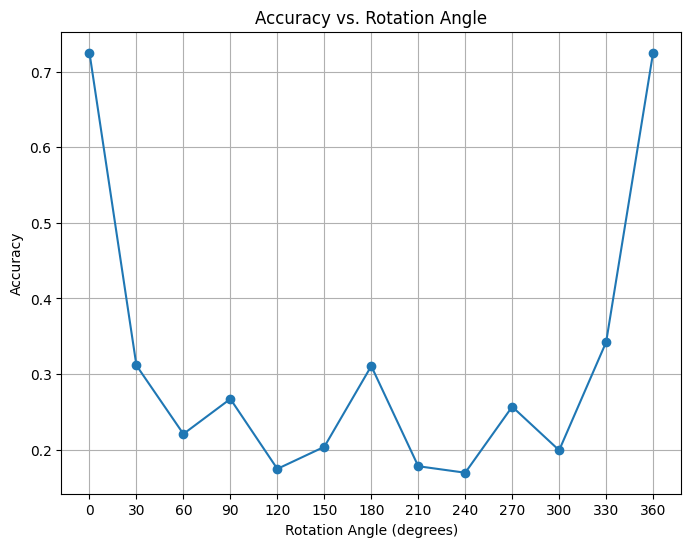

In [21]:
plot(angles,angle_accuracies)

### Question 1.2 (b)

As said in the pdf, now we will first train a model with the same architecture as the previous one (this is, you can use the same to initialize the model as before), changing the train dataset so that it contains _random rotations_ of angles of up to 360 degrees. For this, create a new `train_augmentation_transform` to create the train augmented dataset.

Hint: Check how we used transformations in Question 1.2 (a)

Files already downloaded and verified


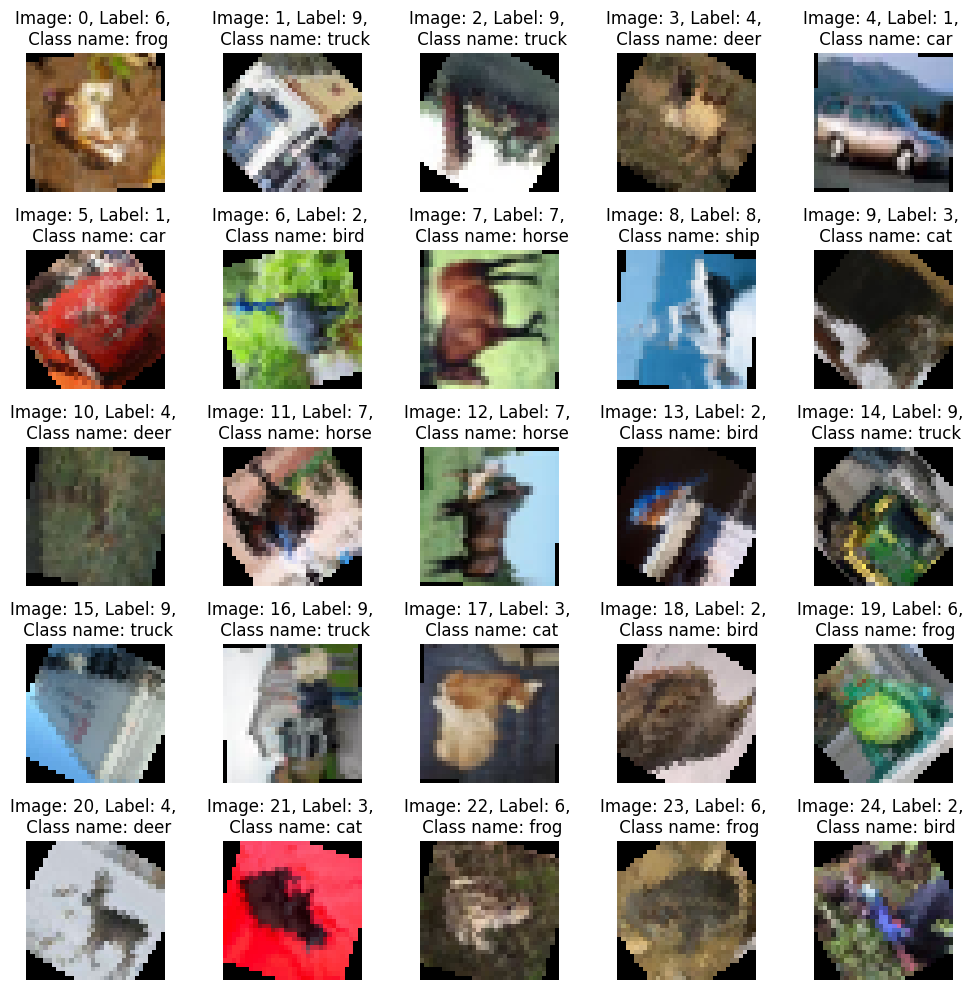

In [22]:
# Create the new train data and loader and visualize it

#######################
# PUT YOUR CODE HERE  #
#######################
train_augmentation_transform = transforms.Compose([
    transforms.RandomRotation((0,360)),
    transforms.ToTensor()])
#######################
# END OF YOUR CODE    #
#######################

train_augmented_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=train_augmentation_transform)
train_augmented_loader = torch.utils.data.DataLoader(train_augmented_data, batch_size=64, shuffle=True)


display_first_few_images(train_augmented_data)

As said, we will now initialize the new model and train it over the `train_augmented_loader` you just created. Initialized the new model as we did in the previous question and train it using the `train` function.

Note: Again, you shouldn't need Snellius to run it

In [23]:
#######################
# PUT YOUR CODE HERE  #
#######################

# Initialize the model
model_augmented = CNN().to(device)

# Train the model
train(model_augmented, train_augmented_loader)

#######################
# END OF YOUR CODE    #
#######################

100%|██████████| 782/782 [00:16<00:00, 46.89it/s]


Epoch 1, Loss: 1.9231


100%|██████████| 782/782 [00:16<00:00, 48.30it/s]


Epoch 2, Loss: 1.6871


100%|██████████| 782/782 [00:15<00:00, 49.06it/s]


Epoch 3, Loss: 1.5821


100%|██████████| 782/782 [00:16<00:00, 47.21it/s]


Epoch 4, Loss: 1.5173


100%|██████████| 782/782 [00:16<00:00, 48.34it/s]


Epoch 5, Loss: 1.4708


100%|██████████| 782/782 [00:16<00:00, 48.50it/s]


Epoch 6, Loss: 1.4306


100%|██████████| 782/782 [00:16<00:00, 46.91it/s]


Epoch 7, Loss: 1.3940


100%|██████████| 782/782 [00:16<00:00, 48.52it/s]


Epoch 8, Loss: 1.3700


100%|██████████| 782/782 [00:15<00:00, 48.92it/s]


Epoch 9, Loss: 1.3471


100%|██████████| 782/782 [00:16<00:00, 47.26it/s]

Epoch 10, Loss: 1.3245


Now, evaluate its performance by running inference over the dataset when rotating the images 0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330 and 360 degrees, and plotting the model's accuracy respect to the angle of rotation of the test dataset. You can use `get_acc_per_angle` and `plot` functions you defined in Question 1.2 (a)!

Hint: The test data is the same as in Question 1.2 (a)

Processing angle: 0
Files already downloaded and verified
Angle: 0, Accuracy: 0.5351
Processing angle: 30
Files already downloaded and verified
Angle: 30, Accuracy: 0.5236
Processing angle: 60
Files already downloaded and verified
Angle: 60, Accuracy: 0.5315
Processing angle: 90
Files already downloaded and verified
Angle: 90, Accuracy: 0.5366
Processing angle: 120
Files already downloaded and verified
Angle: 120, Accuracy: 0.5222
Processing angle: 150
Files already downloaded and verified
Angle: 150, Accuracy: 0.524
Processing angle: 180
Files already downloaded and verified
Angle: 180, Accuracy: 0.5364
Processing angle: 210
Files already downloaded and verified
Angle: 210, Accuracy: 0.5255
Processing angle: 240
Files already downloaded and verified
Angle: 240, Accuracy: 0.5245
Processing angle: 270
Files already downloaded and verified
Angle: 270, Accuracy: 0.5352
Processing angle: 300
Files already downloaded and verified
Angle: 300, Accuracy: 0.5205
Processing angle: 330
Files alre

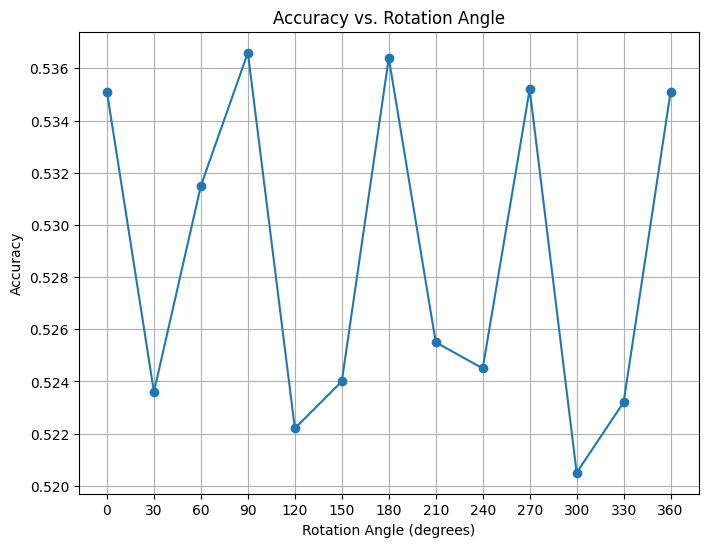

In [24]:
#######################
# PUT YOUR CODE HERE  #
#######################

# Obtain the Angles and Angle Accuracies for the model we trained over train_augmented_loader
#angles, angle_accuracies = get_acc_per_angle(model)
angles_augmented, angle_accuracies_augmented = get_acc_per_angle(model_augmented)

# Plot the obtained augmented Angles vs Angle Accuracies
# Plot accuracy vs rotation angle:  plot(angles,angle_accuracies)
plot(angles_augmented, angle_accuracies_augmented)

#######################
# END OF YOUR CODE    #
#######################

### This was for myself to visualize the difference between the plots better


In [25]:
# Plot accuracy vs rotation angle
def plot_fixed_y(angles, angle_accuracies):
            #######################
            # PUT YOUR CODE HERE  #
            #######################
            # raise NotImplementedError
            plt.figure(figsize=(8, 6))
            plt.plot(angles, angle_accuracies, marker='o')
            plt.title("Accuracy vs. Rotation Angle")
            plt.xlabel("Rotation Angle (degrees)")
            plt.ylabel("Accuracy")
            plt.grid(True)
            plt.xticks(angles)
            plt.yticks(np.arange(0, 1.1, 0.1))
            plt.show()
            #######################
            # END OF YOUR CODE    #
            #######################

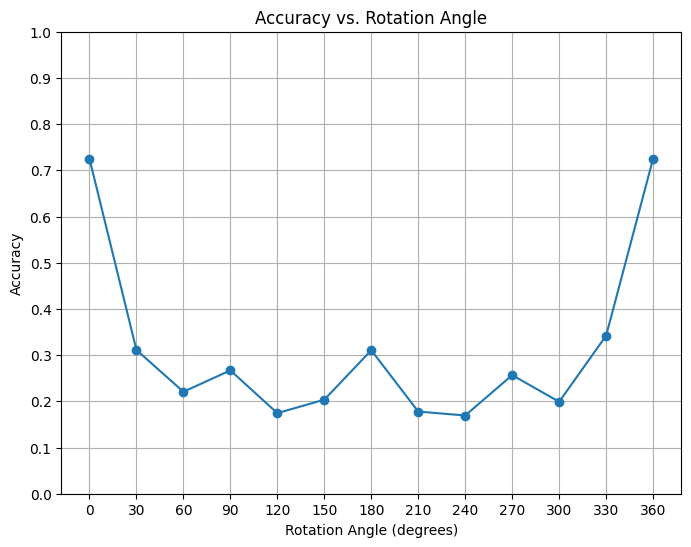

In [26]:
plot_fixed_y(angles,angle_accuracies)

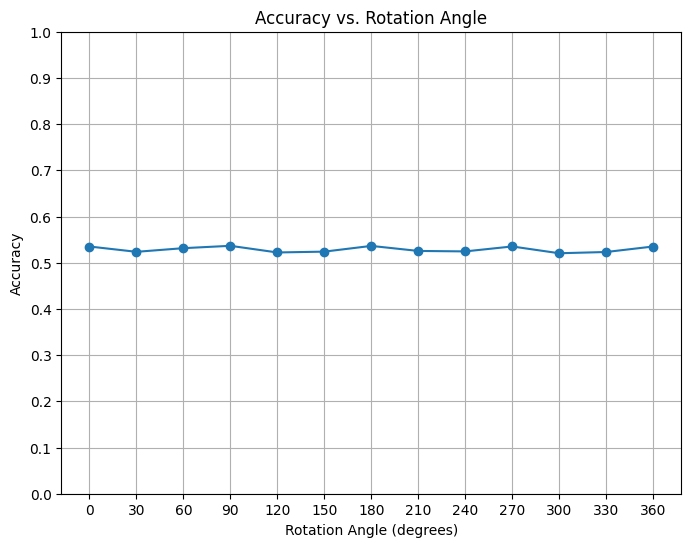

In [27]:
plot_fixed_y(angles_augmented, angle_accuracies_augmented)